<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Time_Series/%EA%B8%88%EC%9C%B5%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EC%BF%A1%EB%B6%81/5%EC%9E%A5_GARCH_%ED%81%B4%EB%9E%98%EC%8A%A4_%EB%AA%A8%EB%8D%B8%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EB%B3%80%EB%8F%99%EC%84%B1_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 6.7 MB/s 
     |████████████████████████████████| 9.8 MB 42.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from arch import arch_model

# 변동성

* 블랙-숄즈 모델은 기초 자산의 변동성에 종속되므로 옵션 가격 책정에 사용
* 포트폴리오의 위험률, 샤프 비율 등과 같은 척도를 계산하는 데 사용되는 리스크 관리에 영향
* CBOE 변동성 지수의 형태로 직접 거래될 수 있기 때문에 개러가 가능

# ARCH 모델을 사용한 주식 수익률의 변동성 설명

* 시계열의 무조건과 조건부의 차이를 명시적으로 인식
* 평균 프로세스에 조건부 분산을 과거 잔차의 함수로 모델링한다
* 무조건 분산은 시간에 대해 일정하다고 가정
* 모델의 사전 잔차 수를 자기회귀 모델과 유사하게 지정해야 함
* 주어진 시계열에 다른 모델을 적합화한 후 얻은 잔차에만 적용해야 한다
* 잔차는 불연속 백색 잡음의 관측값과 유사해야 한다

In [ ]:
# 위험 자산과 기간 지정
RISKY_ASSET = 'GOOG'
START_DATE = '2018-01-01'
END_DATE = '2021-12-31'

In [ ]:
# 데이터 다운로드
df = yf.download(RISKY_ASSET, 
                 start = START_DATE,
                 end = END_DATE,
                 adjusted = True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# 일별 수익률 계산

# 백분율로 표시하여 수치가 매우 작아 scipy 최적화 알고리즘 불안정성 해결
returns = 100 * df['Adj Close'].pct_change().dropna() 
returns.name = 'asset_returns'

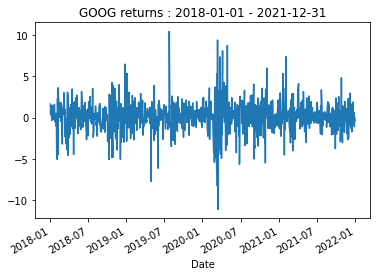

In [ ]:
returns.plot(title=f'{RISKY_ASSET} returns : {START_DATE} - {END_DATE}')

In [ ]:
# ARCH 모델을 지정
model = arch_model(returns, mean = 'Zero', vol = 'ARCH', p = 1, o = 0, q = 0)

In [ ]:
# 모델 추정 / 요약 출력
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1992.08
Distribution:                  Normal   AIC:                           3988.16
Method:            Maximum Likelihood   BIC:                           3997.99
                                        No. Observations:                 1006
Date:                Mon, Aug 08 2022   Df Residuals:                     1006
Time:                        00:21:01   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.4287      0.260      9.358  8.118e-21 [  1.920,  2.93

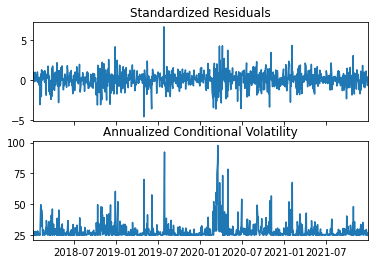

In [ ]:
fig = model_fitted.plot(annualize='D')

# GARCH 모델을 사용한 주식 수익률의 변동성 설명

* 시계열 분산에 적용된 ARMA 모델로 간주할 수 있음
* 지연된 조건부 분산을 사양에 추가

* p : 지연 분산 수
* q : 평균 프로세스의 지연 잔차 수


In [ ]:
# GARCH 모델 지정
model = arch_model(returns,
                   mean = 'Zero', # [제로-평균, 상수 평균, ARIMA의 모든 변형, 회귀 모델]
                   vol = 'GARCH', # [GJR-GARCH, EGARCH, TGARCH, FIGARCH, GARCH-MIDAS, 다변량 GARCH 모델]
                   p = 1, o = 0, q = 1)

In [ ]:
# 모델 추정 / 요약 출력
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1961.76
Distribution:                  Normal   AIC:                           3929.51
Method:            Maximum Likelihood   BIC:                           3944.26
                                        No. Observations:                 1006
Date:                Mon, Aug 08 2022   Df Residuals:                     1006
Time:                        00:29:54   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2980      0.209      1.428      0.153   [ -0.11

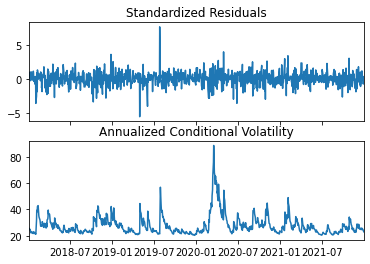

In [ ]:
fig = model_fitted.plot(annualize='D')

# 다변량 변동서 예측을 위한 CCC-GARCH 모델 구현

* 오차항 사이의 조건부 상관관계는 시간에 대해 일정하다
* 개별 조건부 분산은 일변량 GARCH(1, 1) 모델을 따른다

In [ ]:
# 위험 자산과 기간을 설정
RISKY_ASSETS = ['GOOG', 'MSFT', 'AAPL']
N = len(RISKY_ASSETS)
START_DATE = '2018-01-01'
END_DATE = '2021-12-31'

In [ ]:
df = yf.download(RISKY_ASSETS,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True)

print(f'Downloaded {df.shape[0]} rows of data.')

[*********************100%***********************]  3 of 3 completed
Downloaded 1007 rows of data.


In [ ]:
df.head()

Adj Close                            Close                        \
                 AAPL       GOOG       MSFT       AAPL       GOOG       MSFT   
Date                                                                           
2018-01-02  41.018425  53.250000  81.340790  43.064999  53.250000  85.949997   
2018-01-03  41.011284  54.124001  81.719322  43.057499  54.124001  86.349998   
2018-01-04  41.201782  54.320000  82.438568  43.257500  54.320000  87.110001   
2018-01-05  41.670876  55.111500  83.460655  43.750000  55.111500  88.190002   
2018-01-08  41.516098  55.347000  83.545830  43.587502  55.347000  88.279999   

                 High                              Low                        \
                 AAPL       GOOG       MSFT       AAPL       GOOG       MSFT   
Date                                                                           
2018-01-02  43.075001  53.347000  86.309998  42.314999  52.261501  85.500000   
2018-01-03  43.637501  54.314499  86.510002  42.990002  53.160500  85.970001   
2018-01-04  43.367500  54.678501  87.660004  43.020000  54.200100  86.570000   
2018-01-05  43.842499  55.212502  88.410004  43.262501  54.599998  87.430000   
2018-01-08  43.902500  55.563499  88.580002  43.482498  55.081001  87.599998   

                 Open                           Volume                      
                 AAPL       GOOG       MSFT       AAPL      GOOG      MSFT  
Date                                                                        
2018-01-02  42.540001  52.417000  86.129997  102223600  24752000  22483800  
2018-01-03  43.132500  53.215500  86.059998  118071600  28604000  26061400  
2018-01-04  43.134998  54.400002  86.589996   89738400  20092000  21912000  
2018-01-05  43.360001  54.700001  87.660004   94640000  25582000  23407100  
2018-01-08  43.587502  55.111500  88.199997   82271200  20952000  22113000

In [ ]:
# 일별 수익률 계싼
returns = 100 * df['Adj Close'].pct_change().dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6f9da4a10>,
      dtype=object)

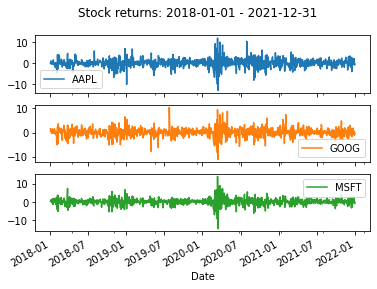

In [ ]:
returns.plot(subplots=True, title=f'Stock returns: {START_DATE} - {END_DATE}')

In [ ]:
# 객체 
coeffs = []
cond_vol = []
std_resids = []
models = []

In [ ]:
# 단변량 GARCH 모델 추정
for asset in returns.columns:

    model = arch_model(returns[asset], 
                       mean='Constant', 
                       vol='GARCH', 
                       p=1, o=0, q=1)\
                       .fit(update_freq=0, disp='off');

    coeffs.append(model.params)
    cond_vol.append(model.conditional_volatility)
    std_resids.append(model.resid / model.conditional_volatility)
    models.append(model)

In [ ]:
# 결과를 데이터프레임에 저장
coeffs_df = pd.DataFrame(coeffs, index=returns.columns)
cond_vol_df = pd.DataFrame(cond_vol).transpose() \
                                    .set_axis(returns.columns, 
                                              axis='columns', 
                                              inplace=False)
                                    
std_resids_df = pd.DataFrame(std_resids).transpose() \
                                        .set_axis(returns.columns, 
                                                  axis='columns', 
                                                  inplace=False)

In [ ]:
display(coeffs_df,
        cond_vol_df.head(),
        std_resids_df.head())

,mu,omega,alpha[1],beta[1]
AAPL,0.254936,0.183080,0.158466,0.803953
GOOG,0.153435,0.318013,0.111038,0.789135
MSFT,0.190414,0.161561,0.196500,0.756290


,AAPL,GOOG,MSFT
Date,,,
2018-01-03,1.434090,1.580788,1.555686
2018-01-04,1.359506,1.592417,1.416600
2018-01-05,1.294585,1.524445,1.331439
2018-01-08,1.286151,1.529910,1.310974
2018-01-09,1.255044,1.474249,1.209502


,AAPL,GOOG,MSFT
Date,,,
2018-01-03,-0.189908,0.941227,0.176740
2018-01-04,0.154149,0.131055,0.486890
2018-01-05,0.682528,0.855178,0.788172
2018-01-08,-0.487007,0.179018,-0.067400
2018-01-09,-0.212266,-0.145746,-0.213628


In [ ]:
# 상수 조건부 상관관계 행렬 계산
R = std_resids_df.transpose() \
                 .dot(std_resids_df) \
                 .div(len(std_resids_df))

In [ ]:
R

,AAPL,GOOG,MSFT
AAPL,0.996654,0.582191,0.629925
GOOG,0.582191,0.997600,0.704764
MSFT,0.629925,0.704764,0.997585


In [ ]:
# 조건부 공분산의 1단계 - 신헝 예측을 계산
diag = []
D = np.zeros((N, N))

for model in models:
    diag.append(model.forecast(horizon=1).variance.values[-1][0])

diag = np.sqrt(np.array(diag))

np.fill_diagonal(D, diag)

H = np.matmul(np.matmul(D, R.values), D)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [ ]:
H

array([[2.52885642, 1.30375364, 1.41531877],
       [1.30375364, 1.97168367, 1.39752384],
       [1.41531877, 1.39752384, 1.98472589]])

In [ ]:
returns.to_csv('returns.csv', index=True)

In [ ]:
r = pd.read_csv('/content/returns.csv')

In [ ]:
r

,Date,AAPL,GOOG,MSFT
0,2018-01-03,-0.017410,1.641316,0.465366
1,2018-01-04,0.464502,0.362130,0.880142
2,2018-01-05,1.138527,1.457106,1.239817
3,2018-01-08,-0.371429,0.427316,0.102054
4,2018-01-09,-0.011467,-0.061431,-0.067969
...,...,...,...,...
1001,2021-12-23,0.364380,0.131676,0.447176
1002,2021-12-27,2.297490,0.626259,2.318570
1003,2021-12-28,-0.576724,-1.091418,-0.350423
1004,2021-12-29,0.050199,0.038582,0.205136
